# Reddit Comments about ChatGPT - EDA Analysis
## Author: Tao Shan
### Description: 

*   This dataset comprises approximately 50,000 comments obtained from Reddit's Posts across four subreddits. Its main purpose is to provide valuable insights into the public's perception of ChatGPT. To achieve this, data cleaning, preprocessing, visualization and modeling are essential steps that will enable answering relevant questions about the dataset.

### Strategies:

*   Data Analytics steps including Data Cleaning, Data Preprocessing, Data Exploration, and Answering relevant questions.
*   Each section above includes an summary for the code.

### Hyperlinks:

*   [Data Cleaning](#1)
*   [Generate more information from text words](#2)
*   [Preprocess Text Words](#3)
*   [Preprocess The Date](#4)
*   [Q1 Sentiment analysis on each subreddit](#Q1)
*   [Q2 Poisson GLM](#Q2)
*   [Q3 Logistic GLM](#Q3)
*   [Q4 Visualization the most common words](#Q4)
*   [Q5 Extra Interesting Patterns](#Q5)

# Import packages

In [554]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import string
import re
import spacy

from tqdm.auto import tqdm
tqdm.pandas()

In [555]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [618]:
from sklearn.model_selection import StratifiedKFold, KFold
from statsmodels.formula.api import glm
from sklearn.metrics import mean_squared_error, accuracy_score,\
    balanced_accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [557]:
df = pd.read_csv(
    "/kaggle/input/merged-reddit-chatgpt/Merged Reddit Database ChatGPT.csv"
)
df.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,X,comment_id,comment_parent_id,comment_body,subreddit,parent_post,post_url,author,date,timestamp,...,post_title,post_text,post_score,post_up_ratio,post_awards,post_golds,post_cross,post_comment_count,Unnamed: 25,Unnamed: 26
0,0.0,iztdxuh,t3_zj2aeu,"I've been shocked for days now, I don't need c...",r/ChatGPT,t3_zj2aeu,https://www.reddit.com/r/ChatGPT/comments/zj2aeu,zookeeper1797,2022-12-11,1.670784e+09,...,"10/10, must-see moment! ChatGPT just did somet...",NaN,16276.0,1.0,10.0,0.0,3.0,280.0,NaN,NaN
1,1.0,iztn0q0,t3_zj2aeu,\n\nI am so angry right now. I just wasted my...,r/ChatGPT,t3_zj2aeu,https://www.reddit.com/r/ChatGPT/comments/zj2aeu,independentTeamwork,2022-12-11,1.670787e+09,...,"10/10, must-see moment! ChatGPT just did somet...",NaN,16276.0,1.0,10.0,0.0,3.0,280.0,NaN,NaN
2,2.0,izudrph,t3_zj2aeu,chatgpt karma whoring is here folks! just when...,r/ChatGPT,t3_zj2aeu,https://www.reddit.com/r/ChatGPT/comments/zj2aeu,NaN,NaN,NaN,...,"10/10, must-see moment! ChatGPT just did somet...",NaN,16276.0,1.0,10.0,0.0,3.0,280.0,NaN,NaN
3,3.0,iztfhtb,t3_zj2aeu,"Worked on me, ngl.",r/ChatGPT,t3_zj2aeu,https://www.reddit.com/r/ChatGPT/comments/zj2aeu,liesonmars,2022-12-11,1.670785e+09,...,"10/10, must-see moment! ChatGPT just did somet...",NaN,16276.0,1.0,10.0,0.0,3.0,280.0,NaN,NaN
4,4.0,izu2as9,t3_zj2aeu,"Certified 10/10, must-see moment. It really di...",r/ChatGPT,t3_zj2aeu,https://www.reddit.com/r/ChatGPT/comments/zj2aeu,[deleted],2022-12-11,1.670793e+09,...,"10/10, must-see moment! ChatGPT just did somet...",NaN,16276.0,1.0,10.0,0.0,3.0,280.0,NaN,NaN


<a name="1"></a>
# Data Cleanning

Data cleaning is an essential step in the data analysis process. The quality of the data can significantly impact the accuracy and reliability of the analysis results. In this case, the data is Missing Completely At Random (MCAR), which means that the missing values are not related to any of the observed or unobserved variables in the dataset. To clean the data, we follow the steps outlined below:

1. Check the percentage of missing values for each column: We need to determine the extent of missingness in the dataset to determine the appropriate imputation method. We can calculate the percentage of missing values for each column to identify the columns with the highest missingness.

1. Visualize the missing values by heat map: We can create a heat map to visualize the distribution of missing values across the dataset. This visualization can help us identify patterns of missingness, such as missing values occurring in specific rows or columns. And also there are some columns always missing together, which also show more pattens in the data.

1. Delete columns with missing values above 80%: If a column has more than 80% missing values, we may choose to delete that column. This decision is based on the assumption that a column with such high missingness may not be useful in our analysis. From the plot of the heatmap, the last 2 columns almost completely missing and no column name to describe its information.

1. Impute missing values using mean or mode for the same subreddit and parent_post: For columns with missing values that we choose to keep, we can impute the missing values using the mean or mode of the observed values for the same subreddit and parent_post. This imputation method is appropriate when the missingness is MCAR. When some post's parent_post are also missing, then impute the missing by only use the same subreddit. 

1. Fill timestamp column by post_timestamp with rescaling: We observe that the column "timestamp" has a very high correlation (0.97) with another column "post_timestamp". Therefore, we can use the "post_timestamp" column to impute the missing values in "timestamp". To do this, we can fill the missing values in "timestamp" using the corresponding values in "post_timestamp". However, since "timestamp" and "post_timestamp" may have different scales, we need to rescale "post_timestamp" to the same scale as "timestamp" before filling the missing values.

## Check missing values

In [558]:
# Null value counts
df.isnull().sum().sort_values(ascending = False)/df.shape[0]

Unnamed: 26           0.999504
Unnamed: 25           0.988133
post_text             0.863355
date                  0.322267
golds                 0.322267
upvotes               0.322267
score                 0.322267
timestamp             0.322267
comment_tree          0.322267
author                0.322267
post_score            0.011467
post_up_ratio         0.000591
post_comment_count    0.000095
post_cross            0.000095
post_golds            0.000095
post_author           0.000095
post_date             0.000095
post_timestamp        0.000095
post_title            0.000095
post_awards           0.000095
X                     0.000019
post_url              0.000000
comment_id            0.000000
subreddit             0.000000
parent_post           0.000000
comment_parent_id     0.000000
comment_body          0.000000
dtype: float64

In [559]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52413 entries, 0 to 52412
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   X                   52412 non-null  float64
 1   comment_id          52413 non-null  object 
 2   comment_parent_id   52413 non-null  object 
 3   comment_body        52413 non-null  object 
 4   subreddit           52413 non-null  object 
 5   parent_post         52413 non-null  object 
 6   post_url            52413 non-null  object 
 7   author              35522 non-null  object 
 8   date                35522 non-null  object 
 9   timestamp           35522 non-null  float64
 10  score               35522 non-null  float64
 11  upvotes             35522 non-null  float64
 12  golds               35522 non-null  float64
 13  comment_tree        35522 non-null  object 
 14  post_author         52408 non-null  object 
 15  post_date           52408 non-null  object 
 16  post

## Visualize Missing Value by heatmap

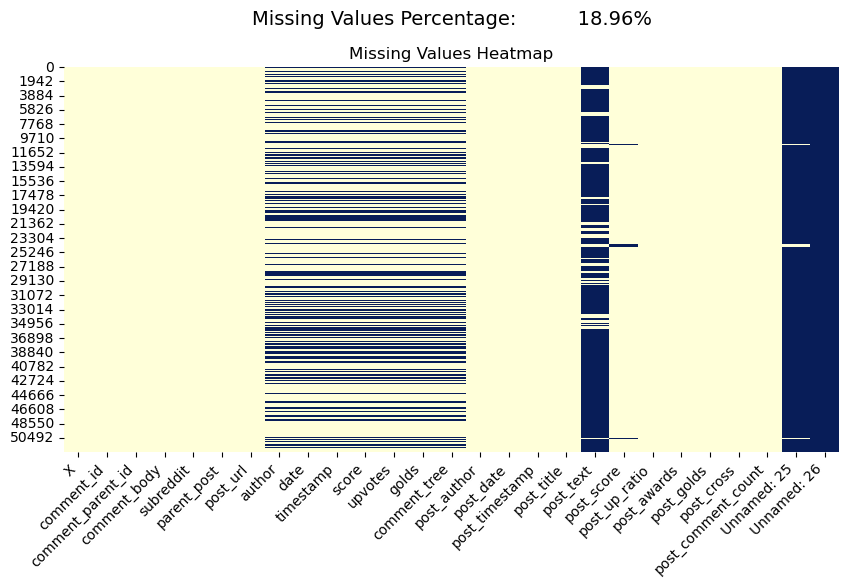

In [560]:
# Total Missing Percentage
missing_percentage = round(df.isnull().sum().sum() / df.size * 100, 2)

plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap='YlGnBu', cbar=False)
plt.text(x=0.5, y=1.1, s=f"Missing Values Percentage: \
         {missing_percentage}%", fontsize=14, ha='center', \
         va='bottom', transform=plt.gca().transAxes)
plt.xticks(rotation=45, ha='right')
plt.title('Missing Values Heatmap')
plt.show()

For post_text, Unnamed:25, Unnamed:26, since there are very high precentage of missing values, delete them.  

In [561]:
df.drop(['post_text','Unnamed: 25', 'Unnamed: 26'], axis = 1, inplace = True)

In [562]:
df.iloc[0:5,7:14]

,author,date,timestamp,score,upvotes,golds,comment_tree
0,zookeeper1797,2022-12-11,1.670784e+09,813.0,813.0,0.0,1
1,independentTeamwork,2022-12-11,1.670787e+09,184.0,184.0,0.0,2
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,liesonmars,2022-12-11,1.670785e+09,67.0,67.0,0.0,4
4,[deleted],2022-12-11,1.670793e+09,11.0,11.0,0.0,5


In [563]:
df['comment_tree'] = df['comment_tree'].astype(float)

In [564]:
# show one example
df.iloc[2,:]

X                                                                   2.0
comment_id                                                      izudrph
comment_parent_id                                             t3_zj2aeu
comment_body          chatgpt karma whoring is here folks! just when...
subreddit                                                     r/ChatGPT
parent_post                                                   t3_zj2aeu
post_url               https://www.reddit.com/r/ChatGPT/comments/zj2aeu
author                                                              NaN
date                                                                NaN
timestamp                                                           NaN
score                                                               NaN
upvotes                                                             NaN
golds                                                               NaN
comment_tree                                                    

For the rest of the columns such as author, date, timestamp,... this means this comment might deleted, so there is no relevant information such as upvotes.

## impute missing values - discover property

First, discover each column's properties

In [565]:
df['author'].nunique()

16741

In [566]:
df.corr()['timestamp'].sort_values(ascending = False)[1:10]

post_timestamp        0.979563
post_comment_count    0.164084
post_cross            0.146889
score                 0.014424
upvotes               0.014424
comment_tree          0.011462
post_golds            0.006841
golds                 0.005222
X                    -0.002718
Name: timestamp, dtype: float64

In [567]:
df.corr()['score'].sort_values(ascending = False)[1:10]

upvotes               1.000000
golds                 0.185341
post_comment_count    0.146375
post_cross            0.113911
post_timestamp        0.019874
post_awards           0.018236
timestamp             0.014424
post_golds            0.009715
comment_tree         -0.006352
Name: score, dtype: float64

For the other columns, we can use mean/mode from the same subreddit and parent_post

## impute missing values

In [568]:
# Null value counts
df.isnull().sum().sort_values(ascending = False)/df.shape[0]

golds                 0.322267
author                0.322267
date                  0.322267
timestamp             0.322267
score                 0.322267
upvotes               0.322267
comment_tree          0.322267
post_score            0.011467
post_up_ratio         0.000591
post_date             0.000095
post_cross            0.000095
post_golds            0.000095
post_awards           0.000095
post_title            0.000095
post_timestamp        0.000095
post_comment_count    0.000095
post_author           0.000095
X                     0.000019
comment_id            0.000000
post_url              0.000000
parent_post           0.000000
subreddit             0.000000
comment_body          0.000000
comment_parent_id     0.000000
dtype: float64

In [569]:
missing_count = df.isnull().sum().sort_values(ascending = False)/df.shape[0]
cols = missing_count.index
cols = cols[cols != 'timestamp']

Use mean/mode from the same subreddit and parent_post

In [570]:
grouped_subreddit = df.reset_index().groupby(['subreddit'])
grouped = df.reset_index().groupby(['subreddit', 'parent_post'])
for col in tqdm(cols):
    if df[col].dtype == 'object':
        mode_by_group = grouped[col].apply(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)
        df[col] = df[col].fillna(mode_by_group)
        # if all the parent_post are missing
        mode_by_group = grouped_subreddit[col].apply(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)
        df[col] = df[col].fillna(mode_by_group)
    else:
        mean_by_group = grouped[col].transform('mean')
        df[col] = df[col].fillna(mean_by_group)
        # if all the parent_post are missing
        mean_by_group = grouped_subreddit[col].transform('mean')
        df[col] = df[col].fillna(mean_by_group)


  0%|          | 0/23 [00:00<?, ?it/s]

In [571]:
# Null value counts
df.isnull().sum().sort_values(ascending = False)/df.shape[0]

timestamp             0.322267
X                     0.000019
author                0.000019
comment_tree          0.000019
upvotes               0.000019
score                 0.000019
date                  0.000019
golds                 0.000019
post_url              0.000000
parent_post           0.000000
subreddit             0.000000
comment_body          0.000000
comment_id            0.000000
comment_parent_id     0.000000
post_author           0.000000
post_date             0.000000
post_timestamp        0.000000
post_title            0.000000
post_score            0.000000
post_up_ratio         0.000000
post_awards           0.000000
post_golds            0.000000
post_cross            0.000000
post_comment_count    0.000000
dtype: float64

Impute timestamp by post_timestamp

In [572]:
# impute timestamp by post_timestamp
corr = df['timestamp'].corr(df['post_timestamp'])
df_non_na = df.dropna()
df['timestamp'] = np.where(df['timestamp'].isnull(), \
                           df['post_timestamp'] * df['timestamp'].mean()/ \
                           df_non_na['post_timestamp'].mean()\
                           , df['timestamp'])


In [573]:
# Null value counts
df.isnull().sum().sort_values(ascending = False)/df.shape[0]

X                     0.000019
author                0.000019
comment_tree          0.000019
upvotes               0.000019
score                 0.000019
date                  0.000019
golds                 0.000019
post_url              0.000000
post_timestamp        0.000000
post_cross            0.000000
post_golds            0.000000
post_awards           0.000000
post_up_ratio         0.000000
post_score            0.000000
post_title            0.000000
post_date             0.000000
parent_post           0.000000
post_author           0.000000
comment_parent_id     0.000000
comment_id            0.000000
comment_body          0.000000
subreddit             0.000000
timestamp             0.000000
post_comment_count    0.000000
dtype: float64

In [574]:
#delete the remain rows (0.0019% of total data)
df.dropna(inplace = True)

In [575]:
# Null value counts
df.isnull().sum().sort_values(ascending = False)/df.shape[0]

X                     0.0
comment_id            0.0
post_cross            0.0
post_golds            0.0
post_awards           0.0
post_up_ratio         0.0
post_score            0.0
post_title            0.0
post_timestamp        0.0
post_date             0.0
post_author           0.0
comment_tree          0.0
golds                 0.0
upvotes               0.0
score                 0.0
timestamp             0.0
date                  0.0
author                0.0
post_url              0.0
parent_post           0.0
subreddit             0.0
comment_body          0.0
comment_parent_id     0.0
post_comment_count    0.0
dtype: float64

<a name="2"></a>

# Generate more information from text words:
* Length of comment
* Presence of anger
* Presence of joy
* Presence of special non alphanumeric character
* Number of stop words

In [576]:
import urllib.request
# Count Length of comment
def count_words(df, col):
    '''col is the text column'''
    df['Count_comment'] = df[col].progress_apply(lambda x: len(x.split()))
    return df

def anger_presence(df, col, angry_words):
    '''col is the text column'''
    
    df['anger_flag'] = df[col].progress_apply(lambda x: sum([1 for word in x.lower().split() if word in angry_words])>0)
    return df

def joy_presence(df, col, joy_words):
    '''col is the text column'''
    df['joy_flag'] = df[col].progress_apply(lambda x: sum([1 for word in x.lower().split() if word in joy_words])>0)
    return df

def special_character(df, col):
    '''col is the text column'''
    pattern = r'[^\w\s,\.?]+' #non alphanumeric character wihtout . , ?
    df['special_character_flag'] = df[col].progress_apply(lambda x: len(re.findall(pattern, x))>0)
    return df

def stop_word_count(string):
    stop=set(stopwords.words('english'))
    words = sum([1 for word in string.split() if word in stop])
    return words

def num_stop_words(df, col):
    '''col is the text column'''
    df['num_stop_words'] = df[col].progress_apply(lambda x: stop_word_count(x))
    return df

# run all preprocessing functions
def preprocess_raw(df,col):
    url = "https://raw.githubusercontent.com/fnielsen/afinn/master/afinn/data/AFINN-111.txt"
    urllib.request.urlretrieve(url, "AFINN-111.txt")
    afinn = pd.read_csv('AFINN-111.txt', sep='\t', header=None, names=['word', 'score'])
    # Filter for positive words
    positive_words = afinn[afinn['score'] > 0]['word'].tolist()
    negative_words = afinn[afinn['score'] < 0]['word'].tolist()
    df = count_words(df, col)
    df = anger_presence(df, col, negative_words)
    df = joy_presence(df, col, positive_words)
    df = special_character(df, col)
    df = num_stop_words(df, col)
    return df

In [577]:
col = 'comment_body'
df = preprocess_raw(df,col)

  0%|          | 0/52412 [00:00<?, ?it/s]

  0%|          | 0/52412 [00:00<?, ?it/s]

  0%|          | 0/52412 [00:00<?, ?it/s]

  0%|          | 0/52412 [00:00<?, ?it/s]

  0%|          | 0/52412 [00:00<?, ?it/s]

In [578]:
df.joy_flag.value_counts()

True     27501
False    24911
Name: joy_flag, dtype: int64

In [579]:
df.anger_flag.value_counts()

False    32418
True     19994
Name: anger_flag, dtype: int64

<a name="3"></a>
# Preprocess the text words
* Lowercase
* Remove Numbers
* Remove extra spaces
* Convert short words such as I'm, He's
* Remove punctuations
* Remove stop words

In [580]:
# lowercase
def lower(df, cols):
    for col in tqdm(cols):
        df[col] = df[col].progress_apply(lambda x: x.lower())
    return df

# number removing
def num_remove(df, cols):
    for col in tqdm(cols):
        df[col] = df[col].progress_apply(lambda x: re.sub(r'\d+', '', x))
    return df

# white spaces removal
def space_remove(df,cols):
    for col in tqdm(cols):
        df[col] = df[col].progress_apply(lambda x: x.strip()) # remove front and end space
        df[col] = df[col].str.replace('\s+', ' ', regex=True) # remove double space
    return df

def to_sentence(df,cols):
    # join words to a sentence
    for col in tqdm(cols):
        df[col] = df[col].progress_apply(lambda x: ' '.join(x))
    return df

# punctuation removal
def punc_remove(df,cols):
    for col in tqdm(cols):
        df[col] = df[col].progress_apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
    return df

# stemming
def stemming(df,cols):
    porter_stemmer  = PorterStemmer()
    for col in tqdm(cols):
        df[col] = df[col].progress_apply(lambda x: [porter_stemmer.stem(w) for w in x.split()])
    df = to_sentence(df,cols)
    return df

# convert short words and urls
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    urlPattern = r"((http://)|(https://)|( www\.)|(com)|(net)|(org))"
    phrase = re.sub(urlPattern,'',phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

# convert cases such as he's, I'm, ...
def short_word_converter(df,cols):
    nlp = spacy.load("en_core_web_sm")
    for col in tqdm(cols):
        df[col] = df[col].progress_apply(lambda x: decontracted(x))
    return df

# stop word removal
def stop_remove(df,cols):
    stops = set(stopwords.words('english'))
    for col in tqdm(cols):
        df[col] = df[col].progress_apply(lambda x: ' '.join([word for word in x.split() if word not in stops]))
    #df = to_sentence(df,cols)
    return df

# run all preprocessing functions
def preprocess(df,cols):
    df[cols] = lower(df,cols)[cols]
    df[cols] = num_remove(df,cols)[cols]
    df[cols] = space_remove(df,cols)[cols]
    df[cols] = short_word_converter(df,cols)[cols] 
    # df[cols] = stemming(df,cols)[cols] 
    df[cols] = punc_remove(df,cols)[cols]
    df[cols] = stop_remove(df,cols)[cols]
    return df

In [581]:
df['comment_body'][0]

"I've been shocked for days now, I don't need clickbait."

In [582]:
df = preprocess(df,['comment_body'])

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/52412 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/52412 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/52412 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/52412 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/52412 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/52412 [00:00<?, ?it/s]

In [583]:
df['comment_body'][0]

'shocked days need clickbait'

<a name="4"></a>
# Preprocess the date

Extract date information to year, month, day, weekdays and hour

In [584]:
df['time'] = pd.to_datetime(df['date'])
df['time']

0       2022-12-11
1       2022-12-11
2       2022-12-12
3       2022-12-11
4       2022-12-11
           ...    
52408   2023-01-16
52409   2023-01-23
52410   2023-01-23
52411   2023-01-24
52412   2023-01-24
Name: time, Length: 52412, dtype: datetime64[ns]

In [585]:
df['month'] = df['time'].dt.month
df['year'] = df['time'].dt.year
df['day'] = df['time'].dt.day
df['hour'] = df['time'].dt.hour
df['day_of_week'] = df['time'].dt.day_name()

In [586]:
df[['year','month','day','hour','day_of_week']].head()

,year,month,day,hour,day_of_week
0,2022,12,11,0,Sunday
1,2022,12,11,0,Sunday
2,2022,12,12,0,Monday
3,2022,12,11,0,Sunday
4,2022,12,11,0,Sunday


# Data Visualization

<a name="Q1"></a>

# Q1 
### Conduct a sentiment analysis on each subreddit

In this question I provided 2 plots to show the average emotional state for each day. The first plot shows AFINN scores which between -2 and 6 to show the emotional state. Then, I simplify this into negative or positive (>0 as positive and <0 as negative).  These two plots shows the similar distributions. The subpost with "Futurology" shows a higher positive rate each day, and the subpost with "dataisbeautiful" shows a lower positive rate each day

In [587]:
# sort by date
df['post_date'] = pd.to_datetime(df['post_date'])
df = df.sort_values(by='post_date')

In [588]:
!pip install afinn

In [589]:
from afinn import Afinn
afinn = Afinn()
df['Afinn_score'] = df['comment_body'].progress_apply(lambda x: afinn.score(x))

  0%|          | 0/52412 [00:00<?, ?it/s]

In [590]:
df['sentiment'] = df['Afinn_score'].progress_apply(lambda x: x>0).map({True: 1, False: 0})

  0%|          | 0/52412 [00:00<?, ?it/s]

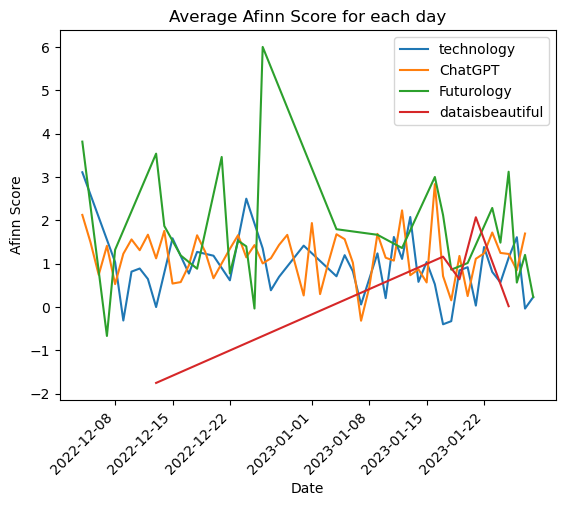

In [591]:
for subreddit in df['subreddit'].unique():
    subreddit_data = df[df['subreddit'] == subreddit]
    avg_scores = subreddit_data.groupby('post_date')['Afinn_score'].mean()
    date = subreddit_data['post_date'].unique()
    plt.plot(date, avg_scores, label = subreddit[2:])
    
plt.xlabel('Date')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Afinn Score')
plt.title('Average Afinn Score for each day')
plt.legend()

plt.show()

Convert the affin score to sentiment analysis

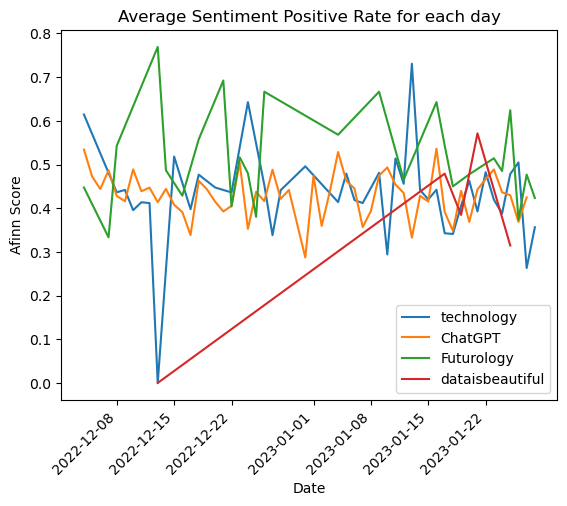

In [592]:
for subreddit in df['subreddit'].unique():
    subreddit_data = df[df['subreddit'] == subreddit]
    avg_scores = subreddit_data.groupby('post_date')['sentiment'].mean()
    date = subreddit_data['post_date'].unique()
    plt.plot(date, avg_scores, label = subreddit[2:])
    
plt.xlabel('Date')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Afinn Score')
plt.title('Average Sentiment Positive Rate for each day')
plt.legend()

plt.show()

<a name="Q2"></a>
# Q2 
### Model the number of upvotes with a Poisson GLM
In this question I checked the properties of data, then removed comments with less than 0 score/net upvotes and create a temporary dataset for this question. For the information from text I selected "anger_flag + joy_flag + Count_comment + special_character_flag + num_stop_words", and for the data surrounding it I choosed "subreddit + year + month + day + hour + day_of_week + post_up_ratio + post_awards + post_cross + post_comment_count". The new column generation steps are shown in the previous steps, and other columns are the original columns in the dataset. 

For the model, I provided a summary chart to show the model's information. The p-values indicate whether each independent variable is statistically significant in predicting the number of upvotes, with smaller p-values suggesting stronger evidence against the null hypothesis of no effect. Only the column "post_up_ratio" does not suggesting stronger evidence against the null hypothesis of no effect.

One other thing to tell is when apply the min-max scaler to make all numeric column's scale between 0 and 1, then the performance increase a lot. I'm using cross-validation with 5 folds to test the model performance, the score imporves from RMSE = 114.62 to 0.01

In [511]:
df.head()

,X,comment_id,comment_parent_id,comment_body,subreddit,parent_post,post_url,author,date,timestamp,...,special_character_flag,num_stop_words,time,month,year,day,hour,day_of_week,Afinn_score,sentiment
50058,14317.0,iyx9291,t3_zckhu6,best tldr could make originalwwwtheguardiantec...,r/technology,t3_zckhu6,https://www.reddit.com/r/technology/comments/z...,drossbots,2022-12-05,1.670264e+09,...,True,65,2022-12-05,12,2022,5,0,Monday,4.0,1
50085,14344.0,iznonpd,t1_iyyqoeo,advancement neural it’s matter time someone sa...,r/technology,t3_zckhu6,https://www.reddit.com/r/technology/comments/z...,drossbots,2022-12-05,1.670264e+09,...,True,50,2022-12-05,12,2022,5,0,Monday,5.0,1
50086,14345.0,iyxkmzd,t1_iyx91fe,tldr using chatgpt openai released chatgpt lat...,r/technology,t3_zckhu6,https://www.reddit.com/r/technology/comments/z...,Burns__,2022-12-04,1.670194e+09,...,True,34,2022-12-04,12,2022,4,0,Sunday,3.0,1
50087,14346.0,iyzh3tl,t1_iyzgu1q,also literally run roblox lua,r/technology,t3_zckhu6,https://www.reddit.com/r/technology/comments/z...,EEEEPIC,2022-12-05,1.670234e+09,...,False,2,2022-12-05,12,2022,5,0,Monday,0.0,0
50088,14347.0,iz0u605,t1_iz0ccgq,absolutely cases it’s great i’ve checked sever...,r/technology,t3_zckhu6,https://www.reddit.com/r/technology/comments/z...,drossbots,2022-12-05,1.670264e+09,...,True,52,2022-12-05,12,2022,5,0,Monday,39.0,1


In [512]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52412 entries, 50058 to 35113
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   X                       52412 non-null  float64       
 1   comment_id              52412 non-null  object        
 2   comment_parent_id       52412 non-null  object        
 3   comment_body            52412 non-null  object        
 4   subreddit               52412 non-null  object        
 5   parent_post             52412 non-null  object        
 6   post_url                52412 non-null  object        
 7   author                  52412 non-null  object        
 8   date                    52412 non-null  object        
 9   timestamp               52412 non-null  float64       
 10  score                   52412 non-null  float64       
 11  upvotes                 52412 non-null  float64       
 12  golds                   52412 non-null  fl

In [513]:
df.post_comment_count

50058     87.0
50085     87.0
50086     87.0
50087     87.0
50088     87.0
         ...  
34178    547.0
34179    547.0
34180    547.0
34204    547.0
35113    139.0
Name: post_comment_count, Length: 52412, dtype: float64

In [514]:
import statsmodels.api as stat

In [653]:
df_temp = df.copy()
df_temp = df_temp[df_temp['upvotes'] >= 0]

# data in the text
text_data = "anger_flag + joy_flag + Count_comment + special_character_flag + num_stop_words"
# data surrounding it
data_surrounding = "subreddit + year + month + day + hour + day_of_week + post_up_ratio + post_awards + post_cross + post_comment_count"


formula = 'upvotes ~ ' + text_data + '+' + data_surrounding

In [596]:
model = glm(formula=formula, data=df_temp, family=stat.families.Poisson()).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                upvotes   No. Observations:                51151
Model:                            GLM   Df Residuals:                    51130
Model Family:                 Poisson   Df Model:                           20
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.3566e+06
Date:                Mon, 13 Mar 2023   Deviance:                   2.5279e+06
Time:                        20:38:57   Pearson chi2:                 1.38e+07
No. Iterations:                     7   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

### Use cross-validation by stratified k folds, to estimate its performance

In [597]:
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=1234)
rmse_array = np.zeros(k)

for i, (train_idx, test_idx) in enumerate(kf.split(df_temp)):
    train_data = df_temp.iloc[train_idx]
    test_data = df_temp.iloc[test_idx]
    
    # FIt the model and predict
    model = glm(formula=formula, data=train_data, family=stat.families.Poisson())
    results = model.fit()
    y_pred = results.predict(test_data)
    
    # RMSE 
    rmse = mean_squared_error(test_data['upvotes'], y_pred, squared=False)
    rmse_array[i] = rmse
    
cv_rmse = np.mean(rmse_array)
print(cv_rmse)

114.6234679395154


Use Min-max Normalization do it again

In [598]:
# normalize df_temp
scaler = MinMaxScaler()
df_temp[df_temp.select_dtypes(include=['number']).columns] = \
    scaler.fit_transform(df_temp.select_dtypes(include=['number']))

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=1234)
rmse_array = np.zeros(k)

for i, (train_idx, test_idx) in enumerate(kf.split(df_temp)):
    train_data = df_temp.iloc[train_idx]
    test_data = df_temp.iloc[test_idx]
    
    # FIt the model and predict
    model = glm(formula=formula, data=train_data, family=stat.families.Poisson())
    results = model.fit()
    y_pred = results.predict(test_data)
    
    # RMSE 
    rmse = mean_squared_error(test_data['upvotes'], y_pred, squared=False)
    rmse_array[i] = rmse
    
cv_rmse = np.mean(rmse_array)
print(cv_rmse)

0.01149683730587184


<a name="Q3"></a>
# Q3
## Model whether a comment has 1 or more vs. 0 or less upvotes with a Logistic GLM

( the question title says: whether a comment has 1 or more vs. 0 or less upvote. However the question's description says: Make a Logistic (binary data) GLM that models the number of upvotes. I'm confusing for the description and my understanding is model whether True for 1 or more upvotes)

In this question I create a temporary dataset and change all upvotes > 0 to True, and no votes to False. For the information from text I selected "anger_flag + joy_flag + Count_comment + special_character_flag + num_stop_words", and for the data surrounding it I choosed "subreddit + year + month + day + hour + day_of_week + post_up_ratio + post_awards + post_cross + post_comment_count". The new column generation steps are shown in the previous steps, and other columns are the original columns in the dataset. 

For the model, I provided a summary chart to show the model's information. The p-values indicate whether each independent variable is statistically significant in predicting the number of upvotes, with smaller p-values suggesting stronger evidence against the null hypothesis of no effect. The columns "day_of_week[T.Saturday]", "day_of_week[T.Sunday]", "day_of_week[T.Wednesday]" and "post_cross" does not suggesting stronger evidence against the null hypothesis of no effect.

I use balanced_accuracy_score to check the result, because the data is imbalanced, with 50074 data points positive and 2338 negative labels. I setting the weight parameter for fitting the imbalanced data. Also I tried lower sampling for the dataset, and show the result by confusion matrixes. The confusion matrixes shows the model does not have great performances, I think the data quality and model could be improve. In part 5 I will use other models and techniques.


In [655]:
df_temp = df.copy()
df_temp['upvotes'] = df['upvotes']>0

In [656]:
df_temp['upvotes'].value_counts()

True     50074
False     2338
Name: upvotes, dtype: int64

In [657]:
df_temp['upvotes'].value_counts().to_dict()

{True: 50074, False: 2338}

In [658]:
class_weights = df_temp['upvotes'].value_counts().to_dict()

In [603]:
model = glm(formula=formula, data=df_temp, family=stat.families.Binomial()).fit()
print(model.summary())

                          Generalized Linear Model Regression Results                          
Dep. Variable:     ['upvotes[False]', 'upvotes[True]']   No. Observations:                52412
Model:                                             GLM   Df Residuals:                    52391
Model Family:                                 Binomial   Df Model:                           20
Link Function:                                   Logit   Scale:                          1.0000
Method:                                           IRLS   Log-Likelihood:                -9051.0
Date:                                 Mon, 13 Mar 2023   Deviance:                       18102.
Time:                                         20:39:55   Pearson chi2:                 4.80e+04
No. Iterations:                                      8   Pseudo R-squ. (CS):            0.01908
Covariance Type:                             nonrobust                                         
                                     coe

### Use cross-validation by stratified k folds, to estimate its performance

In [606]:
train_data.head()

,X,comment_id,comment_parent_id,comment_body,subreddit,parent_post,post_url,author,date,timestamp,...,special_character_flag,num_stop_words,time,month,year,day,hour,day_of_week,Afinn_score,sentiment
50058,14317.0,iyx9291,t3_zckhu6,best tldr could make originalwwwtheguardiantec...,r/technology,t3_zckhu6,https://www.reddit.com/r/technology/comments/z...,drossbots,2022-12-05,1.670264e+09,...,True,65,2022-12-05,12,2022,5,0,Monday,4.0,1
50085,14344.0,iznonpd,t1_iyyqoeo,advancement neural it’s matter time someone sa...,r/technology,t3_zckhu6,https://www.reddit.com/r/technology/comments/z...,drossbots,2022-12-05,1.670264e+09,...,True,50,2022-12-05,12,2022,5,0,Monday,5.0,1
50086,14345.0,iyxkmzd,t1_iyx91fe,tldr using chatgpt openai released chatgpt lat...,r/technology,t3_zckhu6,https://www.reddit.com/r/technology/comments/z...,Burns__,2022-12-04,1.670194e+09,...,True,34,2022-12-04,12,2022,4,0,Sunday,3.0,1
50087,14346.0,iyzh3tl,t1_iyzgu1q,also literally run roblox lua,r/technology,t3_zckhu6,https://www.reddit.com/r/technology/comments/z...,EEEEPIC,2022-12-05,1.670234e+09,...,False,2,2022-12-05,12,2022,5,0,Monday,0.0,0
50088,14347.0,iz0u605,t1_iz0ccgq,absolutely cases it’s great i’ve checked sever...,r/technology,t3_zckhu6,https://www.reddit.com/r/technology/comments/z...,drossbots,2022-12-05,1.670264e+09,...,True,52,2022-12-05,12,2022,5,0,Monday,39.0,1


In [676]:
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=1234)
accuracy_array = np.zeros(k)

for i, (train_idx, test_idx) in enumerate(kf.split(df_temp)):
    train_data = df_temp.iloc[train_idx]
    test_data = df_temp.iloc[test_idx]
    
    # FIt the model and predict
    model = glm(formula=formula, data=train_data, family=stat.families.Binomial())
    results = model.fit(maxiter=100, weights = class_weights)
    y_pred = results.predict(test_data)
    y_pred = y_pred > 0.5 # using 0.5 as threshold
    # Accuracy 
    accuracy = balanced_accuracy_score(test_data['upvotes'], y_pred)
    accuracy_array[i] = accuracy
    
cv_accuracy = np.mean(accuracy_array)
print(cv_accuracy)

0.5


Use min-max scaler do it again

In [669]:
scaler = MinMaxScaler()
df_temp[df_temp.select_dtypes(include=['number']).columns] = \
    scaler.fit_transform(df_temp.select_dtypes(include=['number']))
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=1234)
accuracy_array = np.zeros(k)

for i, (train_idx, test_idx) in enumerate(kf.split(df_temp)):
    train_data = df_temp.iloc[train_idx]
    test_data = df_temp.iloc[test_idx]
    
    # FIt the model and predict
    model = glm(formula=formula, data=train_data, family=stat.families.Binomial())
    results = model.fit(maxiter=100, weights = class_weights)
    y_pred = results.predict(test_data)
    y_pred = y_pred > 0.5 # using 0.5 as threshold
    # Accuracy 
    accuracy = balanced_accuracy_score(test_data['upvotes'], y_pred)
    accuracy_array[i] = accuracy
    
cv_accuracy = np.mean(accuracy_array)
print(cv_accuracy)

0.5


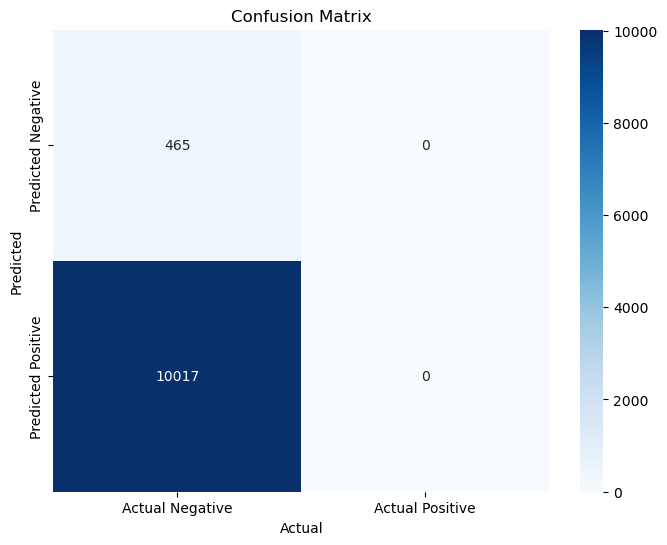

In [670]:
conf_mat = confusion_matrix(test_data['upvotes'], y_pred)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='g', 
            xticklabels=['Actual Negative', 'Actual Positive'], 
            yticklabels=['Predicted Negative', 'Predicted Positive'])
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Confusion Matrix')
plt.show()

This might because of imbalance of data labels. Use SMOTE to balance the data 

In [681]:
from imblearn.under_sampling import RandomUnderSampler

df_resampled, _ = RandomUnderSampler().fit_resample(df_temp, df_temp['upvotes'])

In [682]:
scaler = MinMaxScaler()
df_resampled[df_resampled.select_dtypes(include=['number']).columns] = \
    scaler.fit_transform(df_resampled.select_dtypes(include=['number']))
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=1234)
accuracy_array = np.zeros(k)

for i, (train_idx, test_idx) in enumerate(kf.split(df_resampled)):
    train_data = df_resampled.iloc[train_idx]
    test_data = df_resampled.iloc[test_idx]
    
    # FIt the model and predict
    model = glm(formula=formula, data=train_data, family=stat.families.Binomial())
    results = model.fit(maxiter=100)
    y_pred = results.predict(test_data)
    y_pred = y_pred > 0.5 # using 0.5 as threshold
    # Accuracy 
    accuracy = balanced_accuracy_score(test_data['upvotes'], y_pred)
    accuracy_array[i] = accuracy
    
cv_accuracy = np.mean(accuracy_array)
print(cv_accuracy)

0.37889344158799076


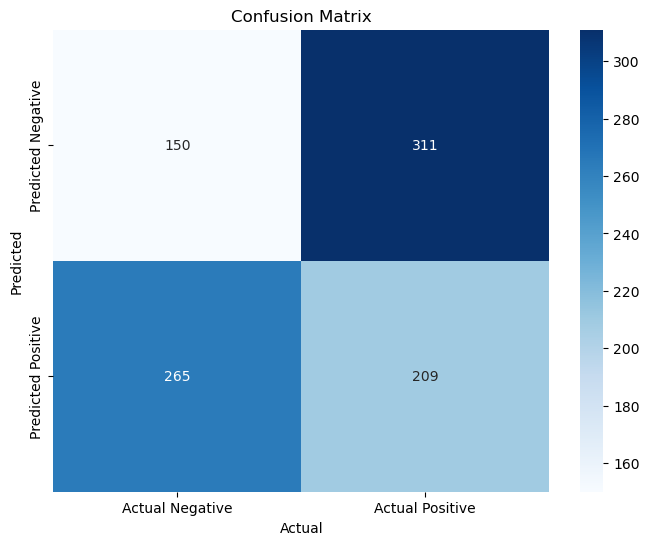

In [683]:
conf_mat = confusion_matrix(test_data['upvotes'], y_pred)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='g', 
            xticklabels=['Actual Negative', 'Actual Positive'], 
            yticklabels=['Predicted Negative', 'Predicted Positive'])
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Confusion Matrix')
plt.show()

The result is worse than before. It might better to change a model, or revise the original quality of the dataset.

<a name="Q4"></a>
# Q4

## Build a visualization to summarize the most common words or themes

In this part I'm using word clouds and bar charts. The word cloud provides some visual representation of the text data that summarize the word distributions by the size of text words in the plot. I seperate the wordcloud and bar charts for positive and negative upvotes. 

For the word cloud, both of the charts shows some common words such as "chatgpt", "people", "ai". This means the words in positive and negative upvotes are similar. There are also some differences such as the word "google" only appears in the plot of negative words but not in positive. 

The bar chart shows the top 10 occurance words in both positive and negative upvotes. By the bar charts, there is almost no significant differences between the occurence of words.


Most Common words bar chart

In [531]:
from wordcloud import WordCloud

In [686]:
word_pos = df_temp[df_temp['upvotes'] == True]['comment_body']
word_neg = df_temp[df_temp['upvotes'] == False]['comment_body']
word_pos = " ".join(i for i in word_pos)
word_neg = " ".join(i for i in word_neg)

In [687]:
wordcloud_pos = WordCloud(collocations = True,
                      background_color="white", colormap = "Set1").generate(word_pos)
wordcloud_neg = WordCloud(collocations = True,
                      background_color="white", colormap = "Blues").generate(word_neg)

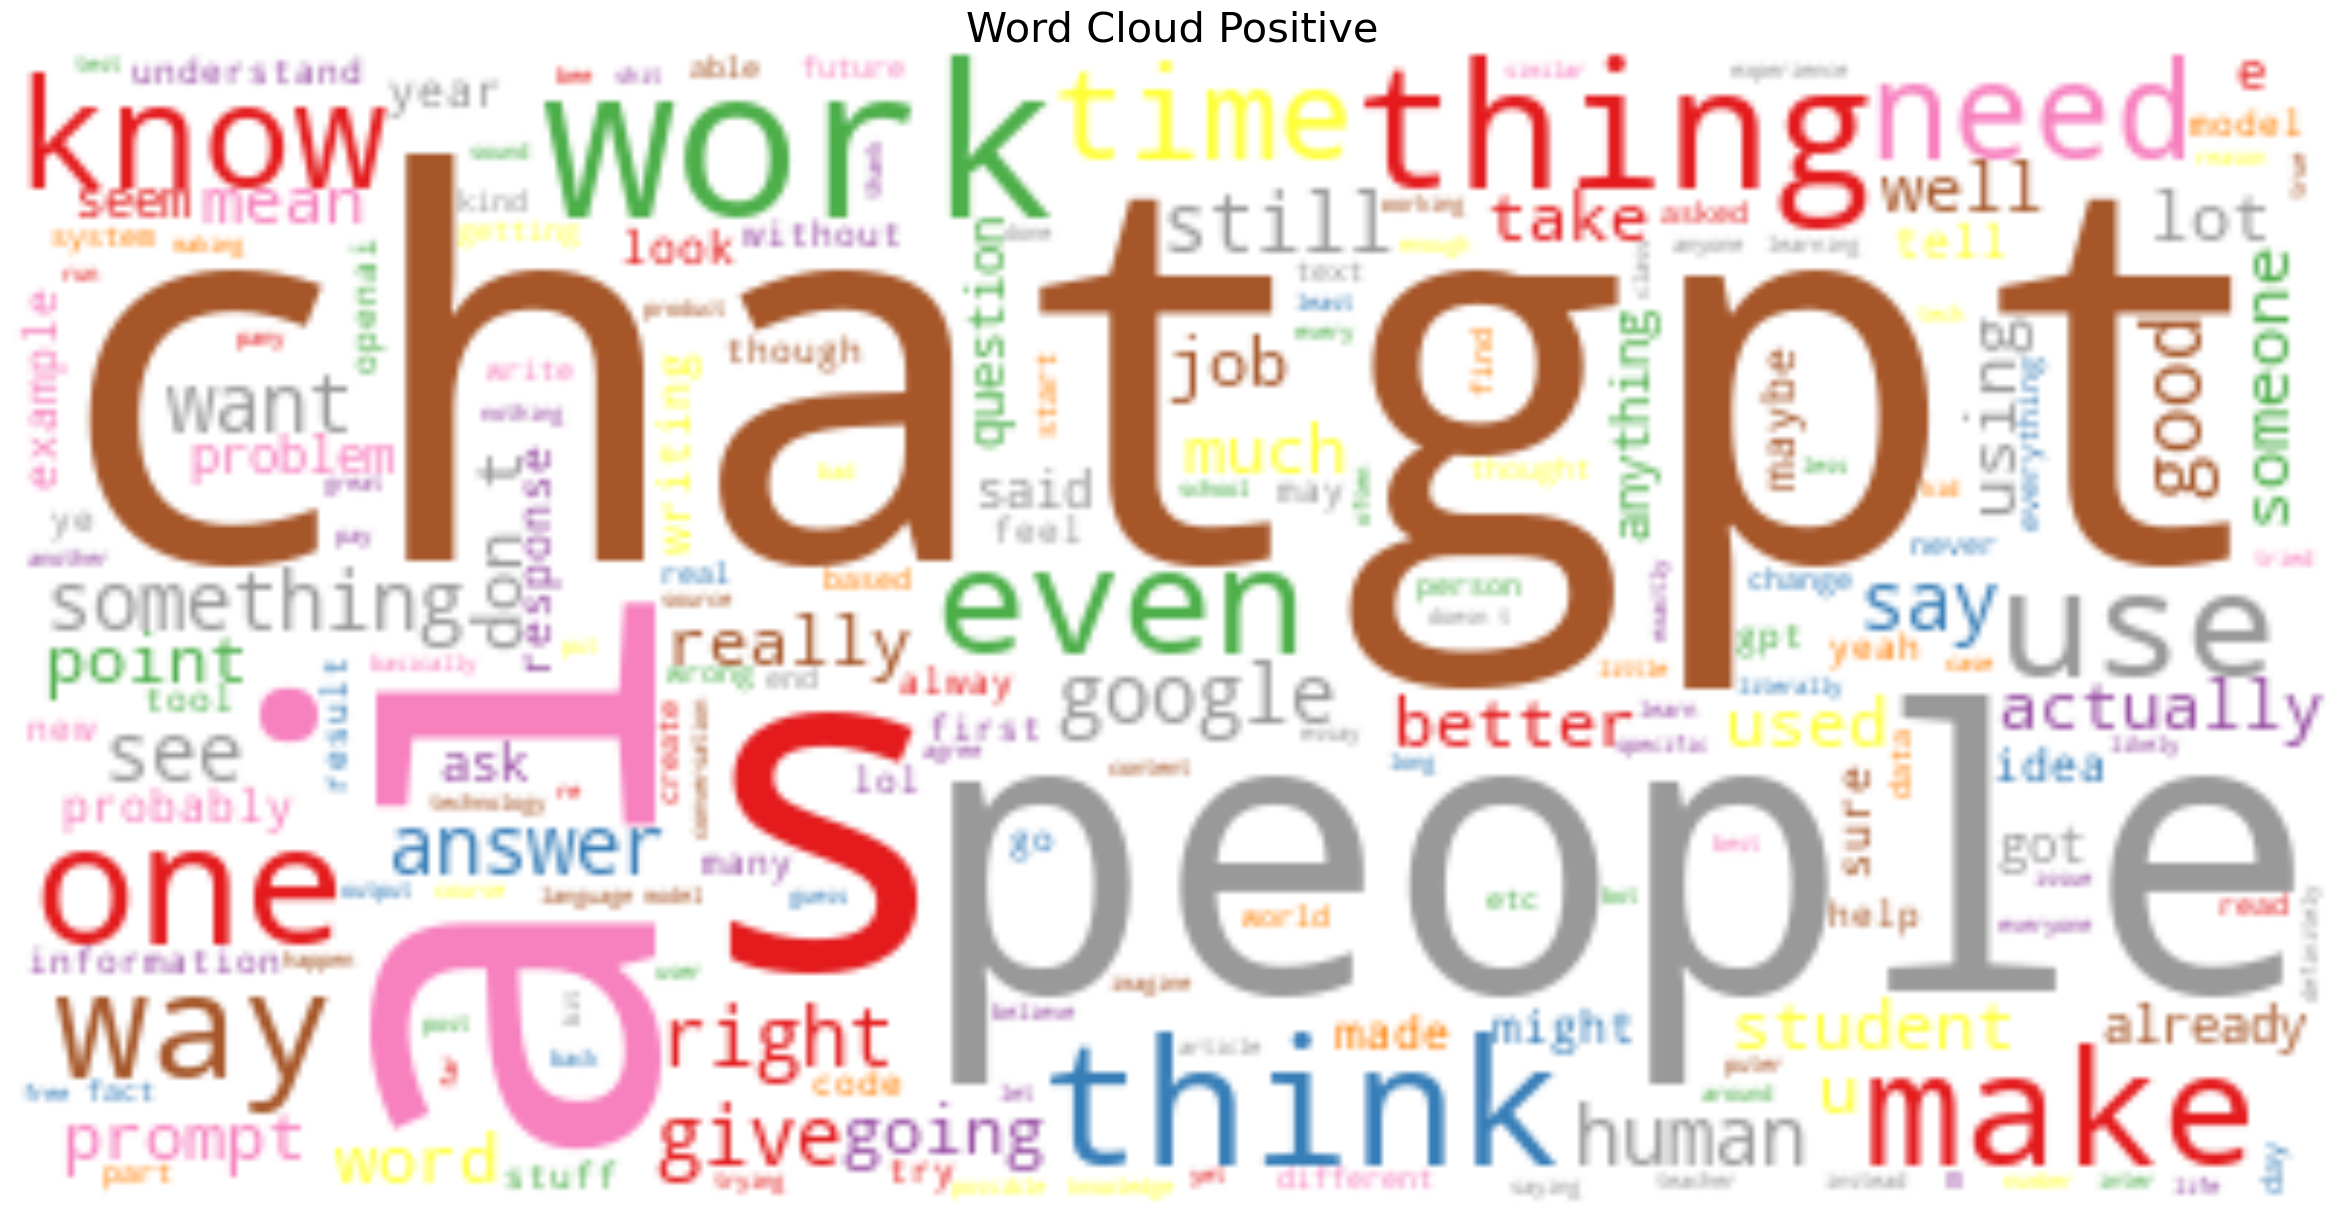

In [688]:
plt.figure(figsize=(30,20))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud Positive', fontsize=30)
plt.savefig('word_cloud_positive.png')
plt.show()

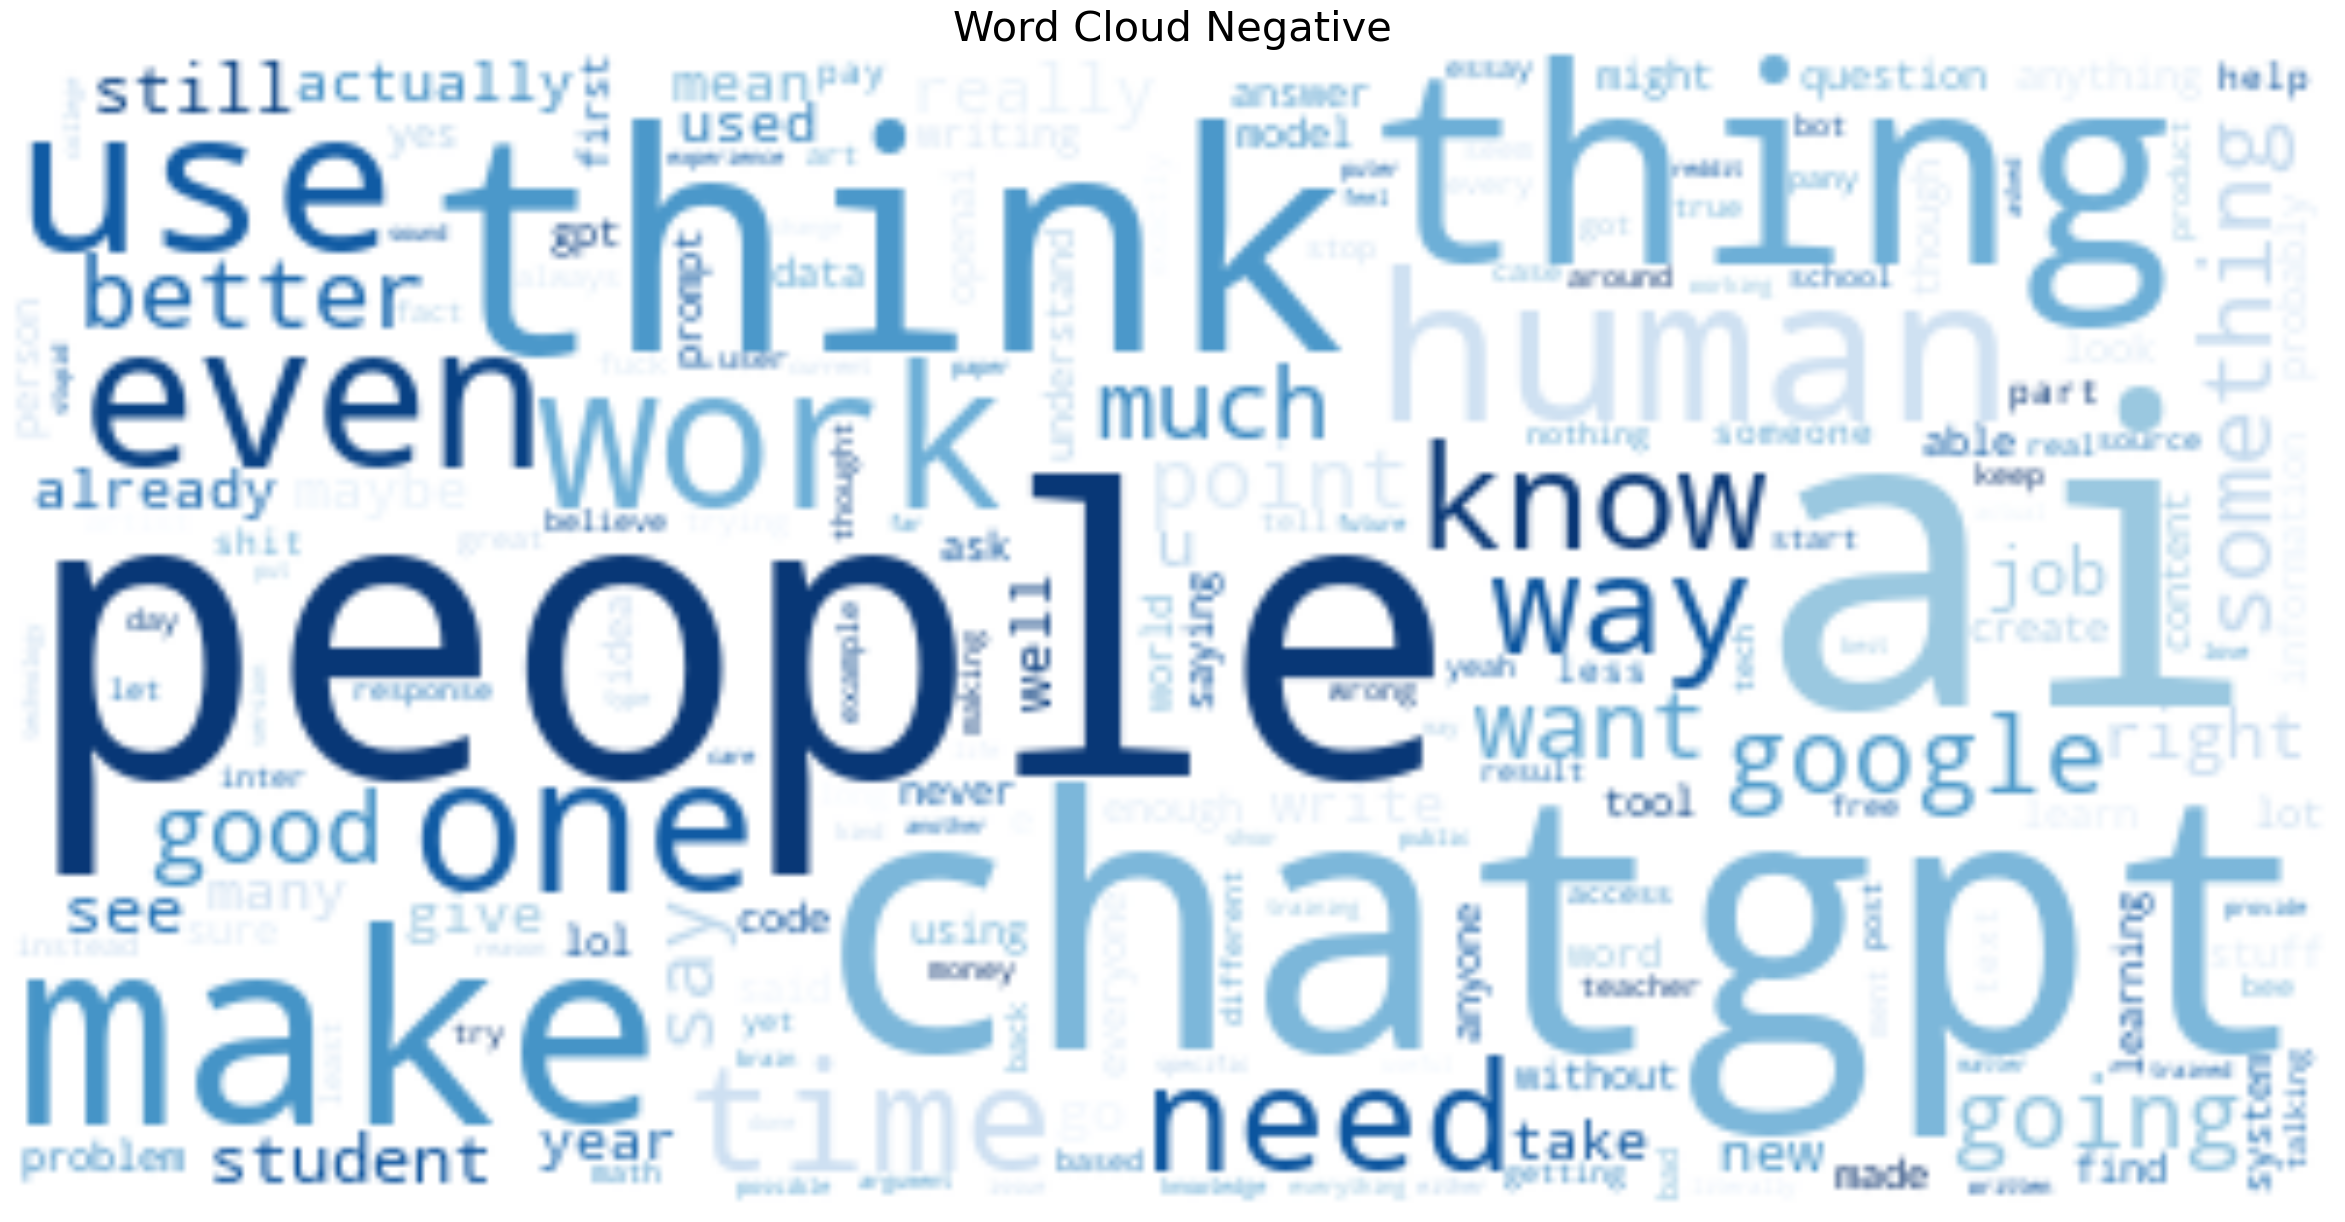

In [689]:
plt.figure(figsize=(30,20))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud Negative', fontsize=30)
plt.savefig('word_cloud_negative.png')
plt.show()

Most Common Words Bar Charts

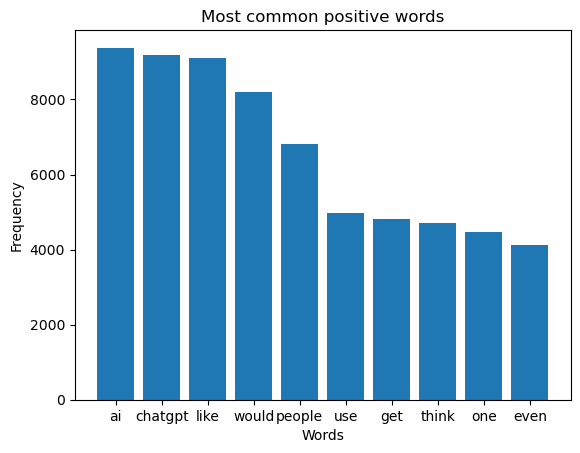

In [690]:
word_count = pd.Series(word_pos.split()).value_counts(ascending = False)
n = 10
top_n_words = word_count[0:n]

plt.bar(range(n), top_n_words.values, tick_label=top_n_words.index)
plt.title('Most common positive words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

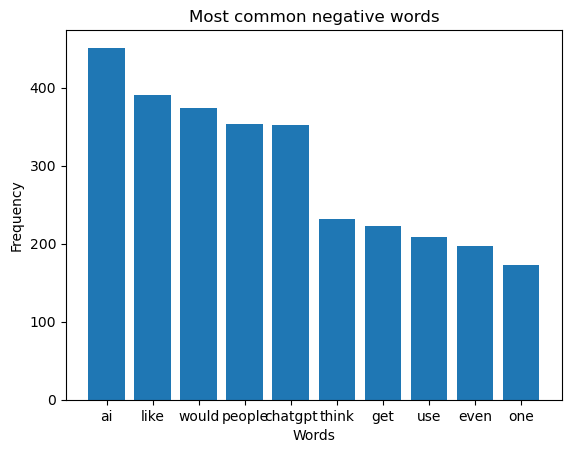

In [691]:
word_count = pd.Series(word_neg.split()).value_counts(ascending = False)
n = 10
top_n_words = word_count[0:n]

plt.bar(range(n), top_n_words.values, tick_label=top_n_words.index)
plt.title('Most common negative words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

<a name="Q5"></a>
# Q5
Find at least two other interesting patterns in the data and comment on them. These could be relationships between data, or interesting distributions, or interesting patterns in time, or
ways to split the data. You are allowed to use plots to make your point. 

### 1. Correlation

For strong correlation between 2 variables, I found ('timestamp', 'post_timestamp'), ('score', 'upvotes'), ('Count_comment', 'num_stop_words') have high correlations. When apply model techniques, we need to delete one of each pair to avoid multicollinearity for the model. 

### 2. PCA + K means

PCA (Principal Component Analysis）is a dimensional reduction technique, which help me select features, reduce noise and using lower feature to explain the whole dataset. Also the method helps me to visulize K means in 2-d format. This makes it easier to understand the relationship within the data.

By visualize the explain variance ratio by PCA, the first two features have very high explained variance ratio. So choose the result of K = 2.

For K-means clustering, I'm choosing the best K by with-in cluster distance and Silhouette Score. Within cluster distance measures the compactness of clusters and helps to identify the optimal number of clusters to ensure that the clusters formed are meaningful and distinct. Silhouette Score is another metric that helps to evaluate the quality of clustering. It measures how similar an object is to its own cluster compared to other clusters. For both plots the elbow point is k = 4.

For the clustering plot, the plot is well seperated with 4 clusters. For further analysis I can use the clustering result to add more features. Also by discover the similarities between each clsters for its original data, which helps us to determine the strategies and better understanding for the data.

### 3. Modeling

another extra thing to do is improve the model (after result of Q3). Here are some comments:

*   it's better to distinguish the upvote by upvotes > 50 or 150
*   Xgboost might get better result
*   Model's weight functions for imbalance labels

To prove these first I plot an distribution plot for number of votes. I found the distribution is very similar between <= 0 and 0-50, so the result might not good by the seperation. I tried the seperation for < 50 and >= 50, then the model becomes much more better. The balanced accuracy for Logistic Regression is 0.74 which is > 0.5. The Xgboost works worse than Logistic Regression but still better than result in Q3.


find pairs of correlation > 0.95

In [538]:
corr_matrix = df.corr()
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i, j] > 0.95 and corr_matrix.columns[i] != corr_matrix.columns[j]:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j]))

print(high_corr_pairs)

[('timestamp', 'post_timestamp'), ('score', 'upvotes'), ('Count_comment', 'num_stop_words')]


Dimensional Reduction

In [539]:
# normalize df
scaler = MinMaxScaler()
df[df.select_dtypes(include=['number']).columns] = \
    scaler.fit_transform(df.select_dtypes(include=['number']))

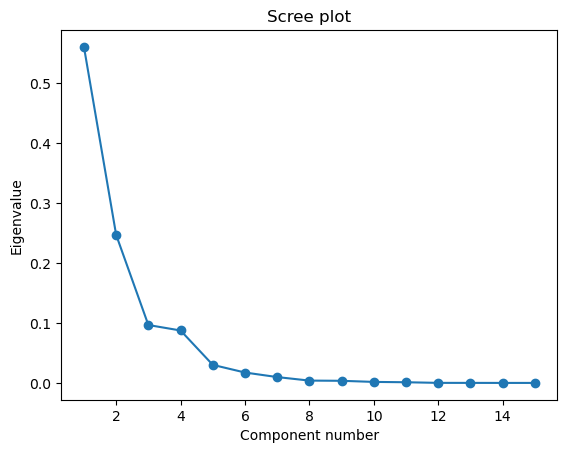

In [540]:
from sklearn.decomposition import PCA

n = 15
pca = PCA(n_components=n)
pca.fit(df.select_dtypes(include=['number']))

# Get the eigenvalues
eigenvalues = pca.explained_variance_

# Plot the line plot of the eigenvalues
plt.plot(np.arange(1, n+1), eigenvalues, marker='o')
plt.xlabel('Component number')
plt.ylabel('Eigenvalue')
plt.title('Scree plot')
plt.show()

Clustering

In [541]:
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

find the best k by intra-cluster distance

  0%|          | 0/9 [00:00<?, ?it/s]

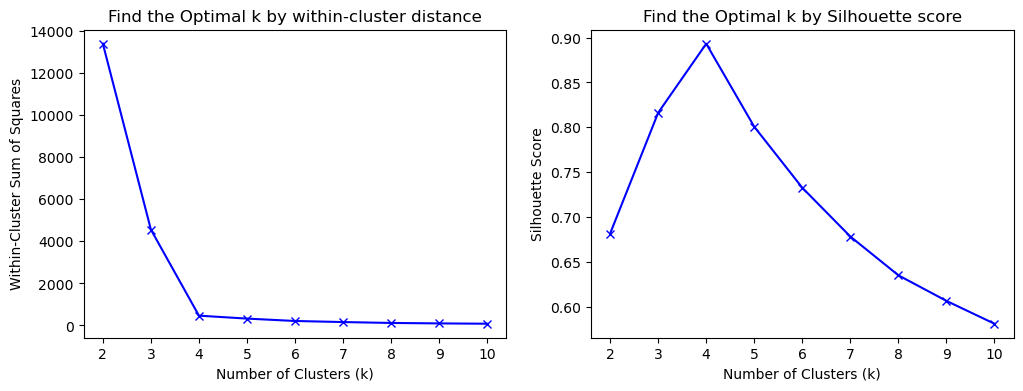

In [542]:
PCA_df = pca.fit_transform(df.select_dtypes(include=['number']))[:,0:2]
PCA_df = pd.DataFrame(data=PCA_df, columns=['PC1', 'PC2'])
wcss = []
silhouette_scores = []

k_values = range(2, 11)
for k in tqdm(k_values):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(PCA_df)
    wcss.append(kmeans.inertia_)
    if k > 1:
        score = silhouette_score(PCA_df, kmeans.labels_)
        silhouette_scores.append(score)

import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(k_values, wcss, 'bx-')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Within-Cluster Sum of Squares')
ax1.set_title('Find the Optimal k by within-cluster distance')

if silhouette_scores:
    ax2.plot(k_values, silhouette_scores, 'bx-')
    ax2.set_xlabel('Number of Clusters (k)')
    ax2.set_ylabel('Silhouette Score')
    ax2.set_title('Find the Optimal k by Silhouette score')

plt.show()

choose k = 4

In [543]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(PCA_df)
labels = kmeans.predict(PCA_df)
PCA_df['Cluster'] = labels

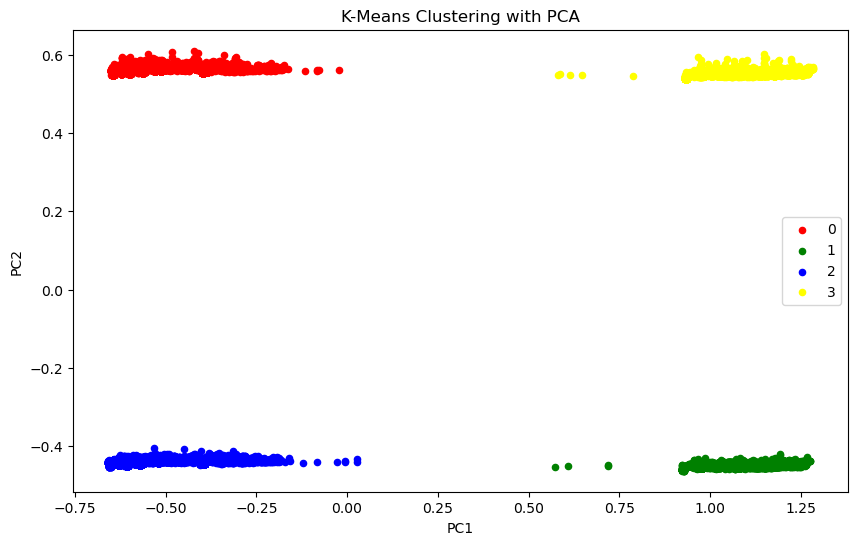

In [544]:
# Plot the clusters on a scatter plot
fig, ax = plt.subplots(figsize=(10, 6))

colors = {0: 'red', 1: 'green', 2: 'blue', 3: 'yellow'}
grouped = PCA_df.groupby('Cluster')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='PC1', y='PC2', label=key, color=colors[key])

plt.title('K-Means Clustering with PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()





another extra thing to do is improve the model (after result of Q3). Here are some comments:

*   it's better to distinguish the upvote by upvotes > 50 or 150
*   Xgboost might get better result
*   Model's weight functions for imbalance labels

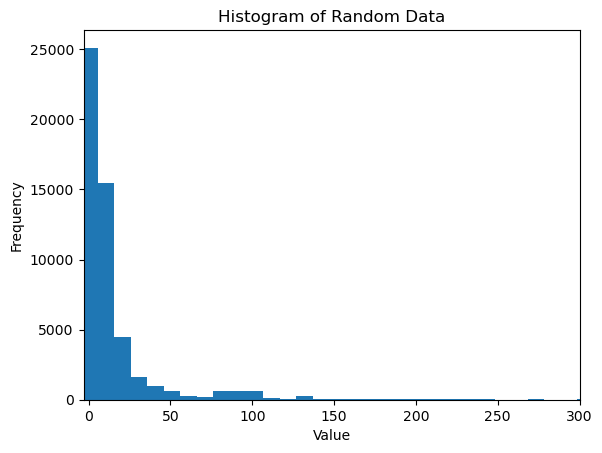

In [712]:
df_temp = df.copy()
plt.hist(df_temp['upvotes'], bins = 1000)
plt.title('Histogram of Random Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xlim([-3, 300])
plt.show()

In [713]:
df_temp['upvotes'] = df['upvotes'] >= 50
df_temp['upvotes'].value_counts()

False    48621
True      3791
Name: upvotes, dtype: int64

In [717]:
formula = text_data + ' + ' + data_surrounding
formula.split(' + ')

['anger_flag',
 'joy_flag',
 'Count_comment',
 'special_character_flag',
 'num_stop_words',
 'subreddit',
 'year',
 'month',
 'day',
 'hour',
 'day_of_week',
 'post_up_ratio',
 'post_awards',
 'post_cross',
 'post_comment_count']

In [718]:
X = df_temp[formula.split(' + ')]
y = df_temp['upvotes']

In [731]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

In [725]:
X.head()

,anger_flag,joy_flag,Count_comment,special_character_flag,num_stop_words,subreddit,year,month,day,hour,day_of_week,post_up_ratio,post_awards,post_cross,post_comment_count
50058,True,True,180,True,65,r/technology,2022,12,5,0,Monday,0.89,0.0,1.0,87.0
50085,True,True,109,True,50,r/technology,2022,12,5,0,Monday,0.89,0.0,1.0,87.0
50086,False,True,92,True,34,r/technology,2022,12,4,0,Sunday,0.89,0.0,1.0,87.0
50087,False,False,7,False,2,r/technology,2022,12,5,0,Monday,0.89,0.0,1.0,87.0
50088,True,True,159,True,52,r/technology,2022,12,5,0,Monday,0.89,0.0,1.0,87.0


One hot encoding

In [727]:
encoded_cols = pd.get_dummies(X['subreddit'], prefix='subreddit')
encoded_cols_day = pd.get_dummies(X['day_of_week'], prefix='day_of_week')

X = pd.concat([X, encoded_cols, encoded_cols_day], axis=1)
X.drop('subreddit', axis=1, inplace=True)
X.drop('day_of_week', axis=1, inplace=True)
X.head()

,anger_flag,joy_flag,Count_comment,special_character_flag,num_stop_words,year,month,day,hour,post_up_ratio,...,subreddit_r/Futurology,subreddit_r/dataisbeautiful,subreddit_r/technology,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
50058,True,True,180,True,65,2022,12,5,0,0.89,...,0,0,1,0,1,0,0,0,0,0
50085,True,True,109,True,50,2022,12,5,0,0.89,...,0,0,1,0,1,0,0,0,0,0
50086,False,True,92,True,34,2022,12,4,0,0.89,...,0,0,1,0,0,0,1,0,0,0
50087,False,False,7,False,2,2022,12,5,0,0.89,...,0,0,1,0,1,0,0,0,0,0
50088,True,True,159,True,52,2022,12,5,0,0.89,...,0,0,1,0,1,0,0,0,0,0


In [729]:
model = LogisticRegression(random_state=1234)
scoring = {'balanced_accuracy': 'balanced_accuracy', 'roc_auc': 'roc_auc'}
scores = cross_validate(model, X, y, cv=5, scoring=scoring)
print("Accuracy: %0.3f (+/- %0.3f)" % (scores['test_balanced_accuracy'].mean(), scores['test_balanced_accuracy'].std()))
print("ROC-AUC: %0.3f (+/- %0.3f)" % (scores['test_roc_auc'].mean(), scores['test_roc_auc'].std()))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy: 0.633 (+/- 0.158)
ROC-AUC: 0.772 (+/- 0.094)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


avoid warning, add max_iter to 5000. class_weight='balanced' also helps the model balance the weight. 

In [739]:
model = LogisticRegression(class_weight='balanced', max_iter=5000, random_state=1234)
scoring = {'balanced_accuracy': 'balanced_accuracy', 'roc_auc': 'roc_auc'}
scores = cross_validate(model, X, y, cv=5, scoring=scoring)
print("Accuracy: %0.3f (+/- %0.3f)" % (scores['test_balanced_accuracy'].mean(), scores['test_balanced_accuracy'].std()))
print("ROC-AUC: %0.3f (+/- %0.3f)" % (scores['test_roc_auc'].mean(), scores['test_roc_auc'].std()))

Accuracy: 0.746 (+/- 0.066)
ROC-AUC: 0.776 (+/- 0.086)


In [732]:
model = XGBClassifier(random_state=1234)
scoring = {'balanced_accuracy': 'balanced_accuracy', 'roc_auc': 'roc_auc'}
scores = cross_validate(model, X, y, cv=5, scoring=scoring)
print("Accuracy: %0.3f (+/- %0.3f)" % (scores['test_balanced_accuracy'].mean(), scores['test_balanced_accuracy'].std()))
print("ROC-AUC: %0.3f (+/- %0.3f)" % (scores['test_roc_auc'].mean(), scores['test_roc_auc'].std()))

Accuracy: 0.545 (+/- 0.067)
ROC-AUC: 0.634 (+/- 0.168)


Xgboost with weight balance

In [742]:
model = XGBClassifier(scale_pos_weight = count[False]/count[True], random_state=1234)
scoring = {'balanced_accuracy': 'balanced_accuracy', 'roc_auc': 'roc_auc'}
scores = cross_validate(model, X, y, cv=5, scoring=scoring)
print("Accuracy: %0.3f (+/- %0.3f)" % (scores['test_balanced_accuracy'].mean(), scores['test_balanced_accuracy'].std()))
print("ROC-AUC: %0.3f (+/- %0.3f)" % (scores['test_roc_auc'].mean(), scores['test_roc_auc'].std()))

Accuracy: 0.589 (+/- 0.064)
ROC-AUC: 0.635 (+/- 0.181)


# Save to pdf

In [743]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.
